In [98]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # will change categorical data to numerical
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%matplotlib inline


In [99]:
insurance = pd.read_csv('stdinsurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,0,3,16884.92400
1,18,1,33.770,1.0,1,2,1725.55230
2,28,1,33.000,3.0,1,2,4449.46200
3,33,1,22.705,0.0,1,4,21984.47061
4,32,1,28.880,0.0,1,4,3866.85520


Data Pre-Processing
1. Binary Switch Sex: Male = 1, female = 0
2. Binary Switch Smoking Status: smoker yes = 1, smoker no = 0
3. Code Region: northeast = 1, southeast = 2, southwest = 3, northwest = 4

In [100]:
insurance = pd.read_csv('stdinsurance.csv')

insurance.replace({'sex':{'female': 0, 'male':1}}, inplace=True)
insurance.replace({'smoker':{'yes': 0, 'no':1}}, inplace=True)
insurance.replace({'region':{'northeast': 1, 'southeast':2, 'southwest':3, 'northwest':4}}, inplace=True)

insurance.to_csv('stdinsurance.csv', index=False)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,0,3,16884.92400
1,18,1,33.770,1.0,1,2,1725.55230
2,28,1,33.000,3.0,1,2,4449.46200
3,33,1,22.705,0.0,1,4,21984.47061
4,32,1,28.880,0.0,1,4,3866.85520


Measures:
1. Data Format
2. Unique Value
3. Missing value (NaN)
4. Data Quality (outliers)
5. Data exploration and visualization



In [101]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


In [102]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.600953,1.041106,0.795217,2.486547,13270.422265
std,14.049960,0.500160,5.991954,1.115854,0.403694,1.104915,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.580000,2.000000,1.000000,3.000000,16639.912515
max,64.000000,1.000000,48.070000,4.000000,1.000000,4.000000,63770.428010


In [103]:
insurance = pd.read_csv('stdinsurance.csv')

row_count = len(insurance)
print("Row count:", row_count)

def output_data(data_col): #looping function for all columns
  print("Max:", data_col.max()) # max value in column
  print("Min:", data_col.min()) # min value in column
  print("Unique numbers:",data_col.unique()) # unique isolates 1 of every occurence
  print("Number of unique values:", len(data_col.unique())) # length of unique values in every column list
  print("Number of NaN:", sum(data_col.isnull())) # is null turns all Nan to True/1, sum adds them up
  print("Data type:", type(data_col[0])) # type/format of first value on list
  print("Standard Deviation:", np.nanstd(data_col)) # std deviation while ignoring NaN
  print("Mean:",np.nanmean(data_col)) # mean of the columns while ignoring NaN
  print("Median:",np.nanmedian(data_col)) # median of the columns while ignoring NaN

  std_dev = np.nanstd(data_col) # set std deviation variable
  mean = np.nanmean(data_col) # set mean variable for std dev
  outlier = 0
  for x in data_col:   # variable created to find outliers
    if x > (3 * std_dev + mean) or x < (mean - 3 * std_dev):
      outlier = outlier + 1
  print("Outlier Count (3 std_dev):", outlier)

for column in insurance:   # names each column for separation
  print(f"-----------------  {column}  -----------------")
  output_data(insurance[column])
  print("\n\n")

Row count: 1338
-----------------  age  -----------------
Max: 64
Min: 18
Unique numbers: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Number of unique values: 47
Number of NaN: 0
Data type: <class 'numpy.int64'>
Standard Deviation: 14.044709038954522
Mean: 39.20702541106129
Median: 39.0
Outlier Count (3 std_dev): 0



-----------------  sex  -----------------
Max: 1
Min: 0
Unique numbers: [0 1]
Number of unique values: 2
Number of NaN: 0
Data type: <class 'numpy.int64'>
Standard Deviation: 0.49997262868009534
Mean: 0.5052316890881914
Median: 1.0
Outlier Count (3 std_dev): 0



-----------------  bmi  -----------------
Max: 48.07
Min: 15.96
Unique numbers: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31 

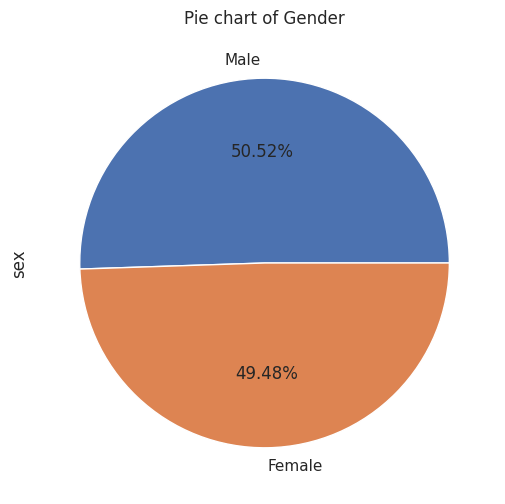

In [104]:

# insurance.plot.pie(y='sex', autopct='1%.1f%%')
sex_bin = insurance["sex"].value_counts() #binary replacement for sex values
plt.figure(figsize=(6, 6)) # size of pie chart figure
plt.pie(sex_bin, labels=["Male","Female"], autopct='%1.2f%%') # labeling
plt.title('Pie chart of Gender') #title
plt.ylabel('sex')
plt.show()


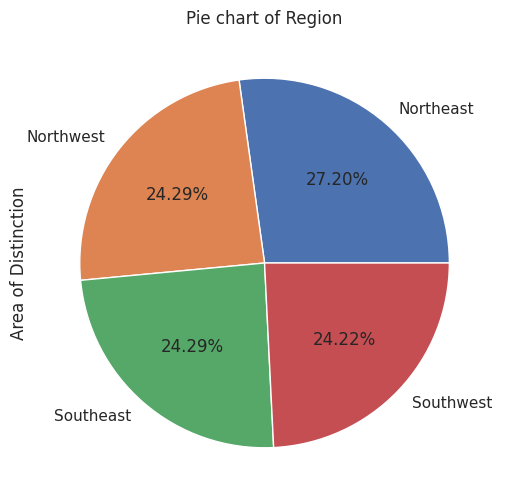

In [105]:

# insurance.plot.pie(y='region', autopct='1%.1f%%')
region_values = insurance["region"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(region_values,  labels=["Northeast","Northwest","Southeast", "Southwest"], autopct='%1.2f%%')
plt.title('Pie chart of Region')
plt.ylabel('Area of Distinction')
plt.show()


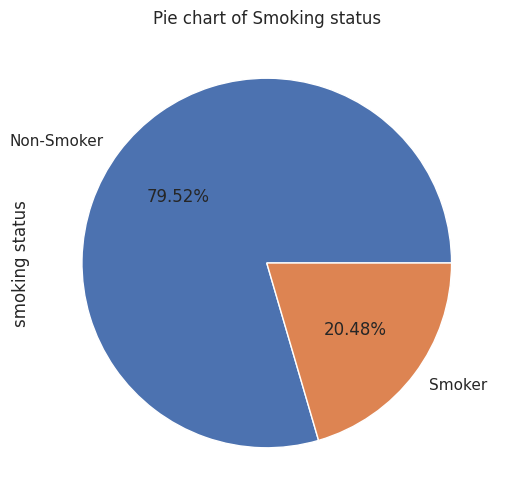

In [106]:

# insurance.plot.pie(y='smoking', autopct='1%.1f%%')
smoker_bin = insurance["smoker"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoker_bin, labels=["Non-Smoker","Smoker"], autopct='%1.2f%%')
plt.title('Pie chart of Smoking status')
plt.ylabel('smoking status')
plt.show()


Nested, Stacked, Horizontal Bar Charts: Analyze target "charges"

<Axes: xlabel='charges_bin'>

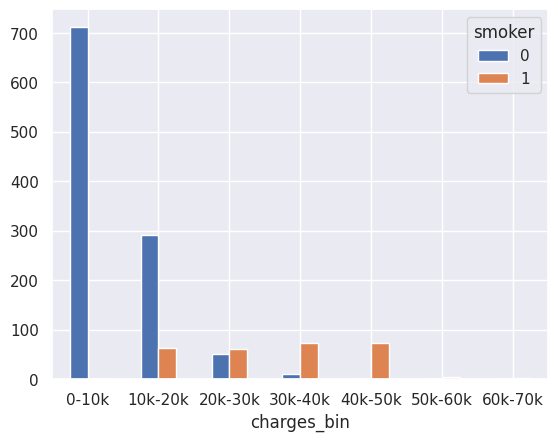

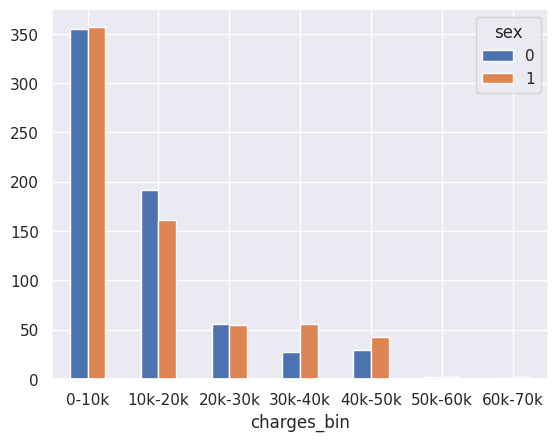

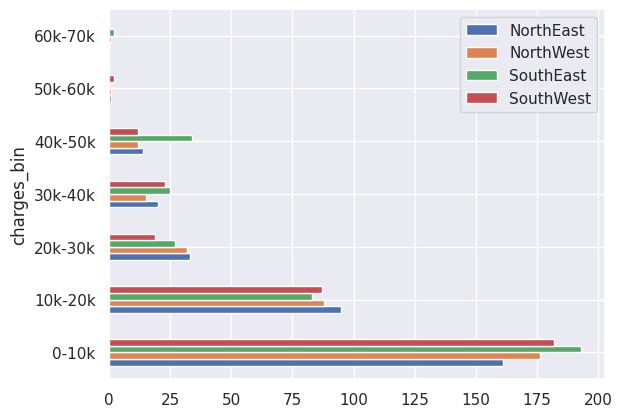

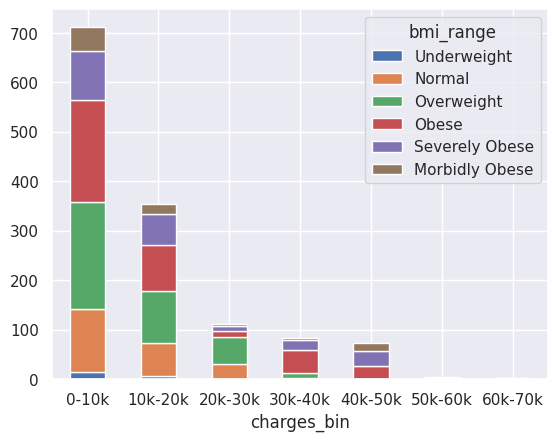

In [107]:
insurancenestbar = pd.read_csv('insurance.csv') # bin charges for nested bargraphs
insurancenestbar['charges_bin'] = pd.cut(insurancenestbar["charges"], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 700000],
                                  labels=['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k'])
insurancenestbar.to_csv('insurance.csv', index=False) # assigns new bin column for charges and puts into csv

insurancenestbar.pivot_table(index='charges_bin', columns='smoker', values='charges', aggfunc='count').plot(kind='bar', rot=0) # pivot table indicates desired index and plot places bar graph using matplot lib

insurancenestbar.pivot_table(index='charges_bin', columns='sex', values='charges', aggfunc='count').plot(kind='bar', rot=0)

region_str = insurancenestbar.pivot_table(index='charges_bin', columns='region', values='charges', aggfunc='count') # horizontal bar chart
ax = region_str.plot.barh(rot=0)
ax.legend(labels=['NorthEast','NorthWest','SouthEast','SouthWest'])

bmigroup = pd.read_csv('insurance.csv') # bin BMI to then pivot table for a nested bargraph comparing charges
bmigroup['bmi_range'] = pd.cut(bmigroup["bmi"], bins=[0, 18.5, 25, 30, 35, 40, 55],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese', 'Morbidly Obese'])
bmigroup.to_csv('insurance.csv', index=False)

bmigroup.pivot_table(index='charges_bin', columns='bmi_range', values='bmi', aggfunc='count').plot(kind='bar', rot=0, stacked=True)

Distribution Graphs via seaborn

<ipython-input-108-3e3e91f84ff3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age']) # for numerical values use distplot
<ipython-input-108-3e3e91f84ff3>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])
<ipython-input-108-3e3e91f84ff3>:40: UserWarning: 

`distpl

<function matplotlib.pyplot.show(close=None, block=None)>

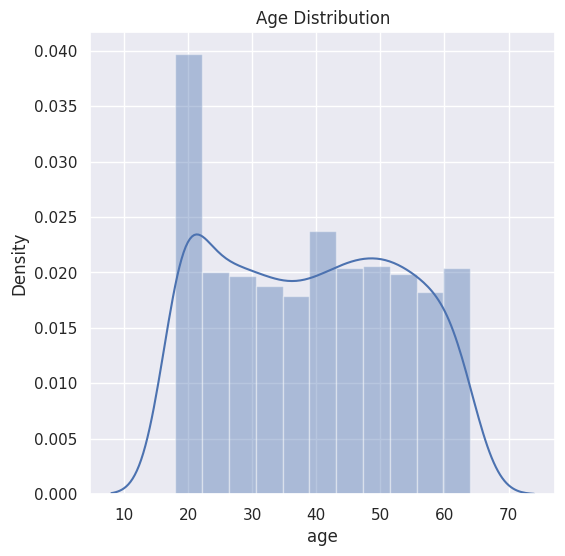

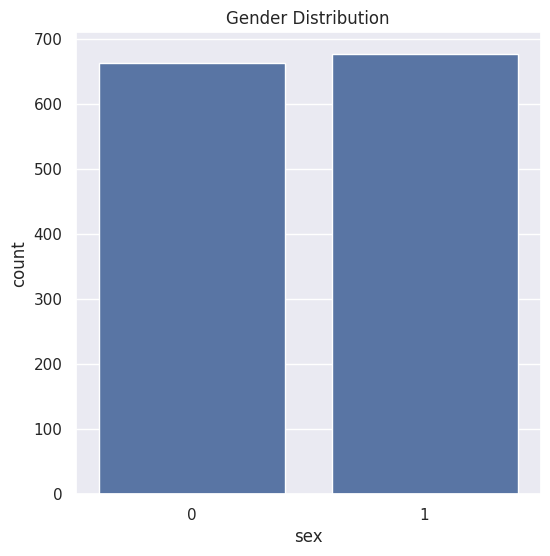

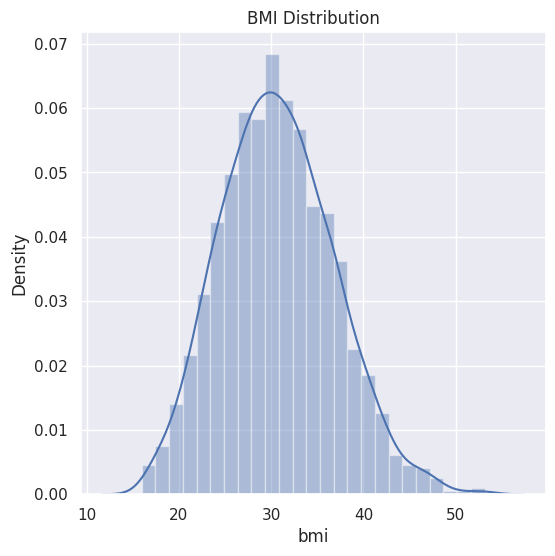

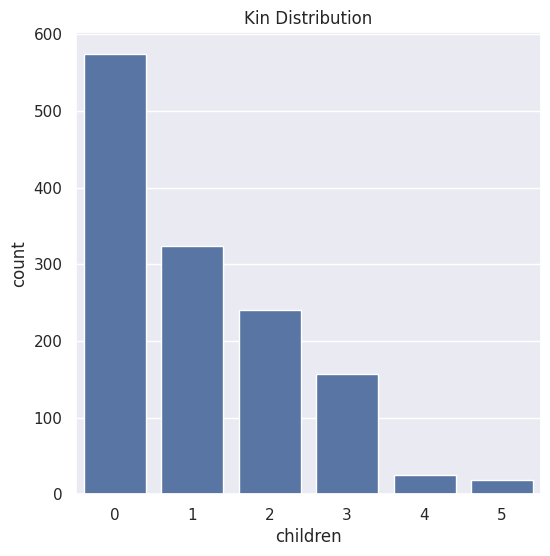

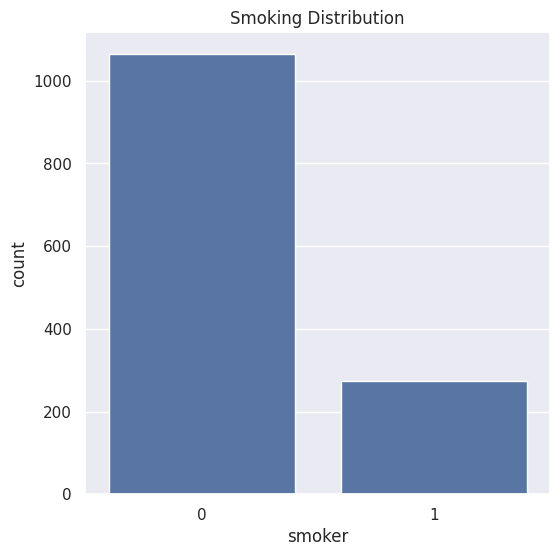

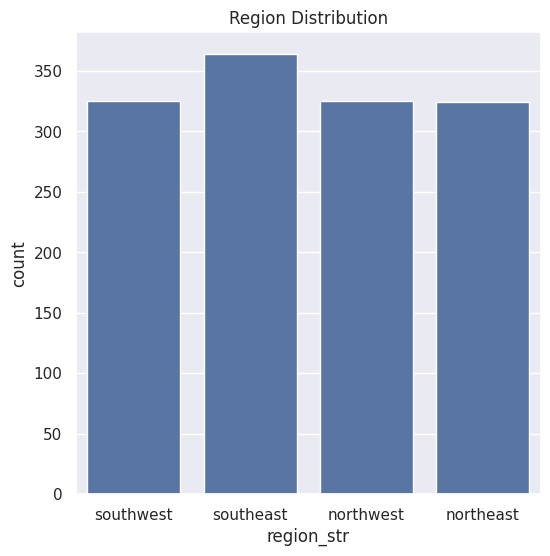

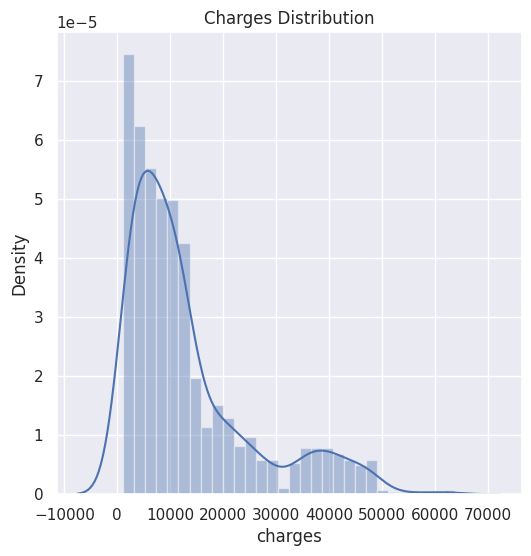

In [108]:
insurance = pd.read_csv('insurance.csv')
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age']) # for numerical values use distplot
plt.title('Age Distribution')
plt.show

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data = insurance) # for strings use countplot
plt.title('Gender Distribution')
plt.show

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('BMI Distribution')
plt.show

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= 'children', data = insurance)
plt.title('Kin Distribution')
plt.show

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= 'smoker', data = insurance)
plt.title('Smoking Distribution')
plt.show

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= 'region_str', data = insurance)
plt.title('Region Distribution')
plt.show

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Charges Distribution')
plt.show

Correcting Outliers via Median Imputation

In [109]:
insurance = pd.read_csv('stdinsurance.csv')
def impute_outlier_median(insurance, column):
  mean = insurance[column].mean()
  std = insurance[column].std()
  median = insurance[column].median()
  lower_bound = mean - 3 * std
  upper_bound = mean + 3 * std
  insurance[column]= np.where(insurance[column] > upper_bound, median, insurance[column])
  insurance[column]= np.where(insurance[column] < lower_bound, median, insurance[column])
  return insurance

columns_to_impute = ['bmi','children']
for column in columns_to_impute:
  insurance = impute_outlier_median(insurance, column)

insurance.to_csv('stdinsurance.csv', index=False)

def output_data(data_col):
  print("Standard Deviation:", np.nanstd(data_col))
  print("Mean:",np.nanmean(data_col))
  print("Median:",np.nanmedian(data_col))

  std_dev = np.nanstd(data_col)
  mean = np.nanmean(data_col)
  outlier = 0
  for x in data_col:
    if x > (3 * std_dev + mean) or x < (mean - 3 * std_dev):
      outlier = outlier + 1
  print("Outlier Count (3 std_dev):", outlier)

for column in insurance:
    print(f"-----------------  {column}  -----------------")
    output_data(insurance[column])
    print("\n\n")

-----------------  age  -----------------
Standard Deviation: 14.044709038954522
Mean: 39.20702541106129
Median: 39.0
Outlier Count (3 std_dev): 0



-----------------  sex  -----------------
Standard Deviation: 0.49997262868009534
Mean: 0.5052316890881914
Median: 1.0
Outlier Count (3 std_dev): 0



-----------------  bmi  -----------------
Standard Deviation: 5.989714372039793
Mean: 30.600952914798203
Median: 30.4
Outlier Count (3 std_dev): 0



-----------------  children  -----------------
Standard Deviation: 1.1154369876154444
Mean: 1.0411061285500747
Median: 1.0
Outlier Count (3 std_dev): 0



-----------------  smoker  -----------------
Standard Deviation: 0.4035431520843401
Mean: 0.7952167414050823
Median: 1.0
Outlier Count (3 std_dev): 0



-----------------  region  -----------------
Standard Deviation: 1.1045015404539715
Mean: 2.486547085201794
Median: 2.0
Outlier Count (3 std_dev): 0



-----------------  charges  -----------------
Standard Deviation: 12105.484975561612
Mean

Feature and Target Splitting for Linear Regression Model

In [110]:
insurance = pd.read_csv('stdinsurance.csv')
X = insurance.drop(['charges'], axis=1)
Y = insurance['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [111]:
regressor = LinearRegression() # set model
regressor.fit(X_train, Y_train)

LinearRegression()

Evaluation Model

In [112]:
# prediction on training set and r2 value
trainingset_pred = regressor.predict(X_train)
r2_training = metrics.r2_score(Y_train, trainingset_pred)
print('R2 Score:', r2_training)

R2 Score: 0.7433626998159275


In [113]:
# prediction on test set and r2 value
testset_pred = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, testset_pred)
print('R2 Score:', r2_test)

R2 Score: 0.7640044275698938


Next Model: Random Forest Regression prior to Feature Selection and Tuning

In [114]:
insurance = pd.read_csv('stdinsurance.csv')
X = insurance.drop(['charges'], axis=1)
Y = insurance['charges']

Rfmodel = RandomForestRegressor(n_estimators=100, max_depth=7, # number of trees and number of splits
                                oob_score = True) # bootstrap model to avoid overfitting
Rfmodel.fit(X_train, Y_train)

print(Rfmodel.oob_score_)

y_pred = Rfmodel.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

0.8435387570407871
Mean Squared Error: 20043658.791221853
Mean Absolute Error: 2470.3165066575375


HyperParameter Tuning using GridSearch

---



In [115]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

insurance = pd.read_csv('stdinsurance.csv')
X = insurance.drop(['charges'], axis=1)
Y = insurance['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

rf_randomsearch = RandomForestRegressor(random_state=42)

# grid the different tuning methods for random forest
param_tuning = {
    'n_estimators':np.arange(20,100,10), #start,stop,step intervals
    'max_features':np.arange(0.3, 1, 0.1), # ^same:number of features per subset
    'max_depth': [3,5,7,9], # of tree levels
    'min_samples_split': [2,5,9], # min samples to split internal node
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False] # min samples at leaf node
}

rand_search = RSCV(estimator=rf_randomsearch, param_distributions=param_tuning, n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
rand_search.fit(X_train, Y_train)

best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Best Hyperparameters: {rand_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 30, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 0.8000000000000003, 'max_depth': 5, 'bootstrap': True}
Mean Squared Error: 18866543.147147488
Mean Absolute Error: 2533.7821411004415
R2 Score: 0.8713273166085764


Feature Importance via Random Forest Classifier

In [116]:
# grid the different tuning methods for random forest
param_grid = {
    'n_estimators':np.arange(20,100,20), #start,stop,step intervals
    'max_features':np.arange(0.3,1,0.1), #start,stop,step intervals
    'max_depth': [3,5,7],
    'max_samples': [0.5,0.7,0.8]} # what percent to train on if float value

lab_enc = LabelEncoder() # needs to convert cont. variable to discrete for classifying task (target value)
Y = lab_enc.fit_transform(Y)

model = RSCV(RandomForestClassifier(), param_grid, n_iter=10, cv=2).fit(X,Y)
model = model.best_estimator_
model.fit(X, Y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:") # BMI gives feature importance of ~0.49
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Feature ranking:
1. feature 2 (0.408523)
2. feature 0 (0.242916)
3. feature 3 (0.116574)
4. feature 5 (0.106086)
5. feature 1 (0.068432)
6. feature 4 (0.057470)


Feature Selection via Recursive Building DataFrame
- Permutation

In [117]:
import random
from random import sample, shuffle
rng = np.random.RandomState(42)

stdinsurance = pd.read_csv('stdinsurance.csv')

scores = {'column': [], 'importance': []} #will set the recursive equation for DF

labels = stdinsurance['charges']
columns = stdinsurance.drop(['charges'], axis=1).columns # will include all columns but 'charges'

LE = LabelEncoder()
labels2 = LE.fit_transform(labels)

base_score = model.score(stdinsurance[columns], labels2)

for col in columns:
    Z = stdinsurance[columns].copy()
    Z[col] = rng.shuffle(Z[col]) # will shuffle the columns while still keeping them in the appropriate 2D array so that model.score(Z, labels2) returns appropriately
    scores['column'].append(col)
    imp = base_score - model.score(Z, labels2) # difference in score for each column recursively
    scores['importance'].append(imp)

print(pd.DataFrame(scores).sort_values('importance', ascending=False))

Streaming output truncated to the last 5000 lines.
<ipython-input-117-278d36b774d6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z[col] = rng.shuffle(Z[col]) # will shuffle the columns while still keeping them in the appropriate 2D array so that model.score(Z, labels2) returns appropriately
<ipython-input-117-278d36b774d6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z[col] = rng.shuffle(Z[col]) # will shuffle the columns while still keeping them in the appropriate 2D array so that model.score(Z, labels2) returns appropriately
<ipython-input-117-278d36b774d6>:19: SettingWithCopyWarning: 
A value is trying to 

     column  importance
0       age    0.375934
2       bmi    0.351271
5    region    0.227205
3  children    0.188341
4    smoker    0.091181
1       sex    0.082212


Random Forest Regressor after Tuning Parameters
- Include Hyperparameters
- All features kept (categorical features kept, none under 0.05)

In [122]:
insurance_final = pd.read_csv('stdinsurance.csv')

X = insurance_final.drop(['charges'], axis=1)
Y = insurance_final['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

final_rf_regressor = RandomForestRegressor(n_estimators=30, min_samples_split=9, min_samples_leaf=4, max_features=0.8, max_depth=5, bootstrap=True,
                                oob_score=True) # bootstrap model to avoid overfitting
final_rf_regressor.fit(X_train, Y_train)

print(final_rf_regressor.oob_score_)

y_pred = final_rf_regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

0.8512131466823081
Mean Squared Error: 18379230.13370096
Mean Absolute Error: 2443.7893138181203


Decision Tree from Random Forest Example

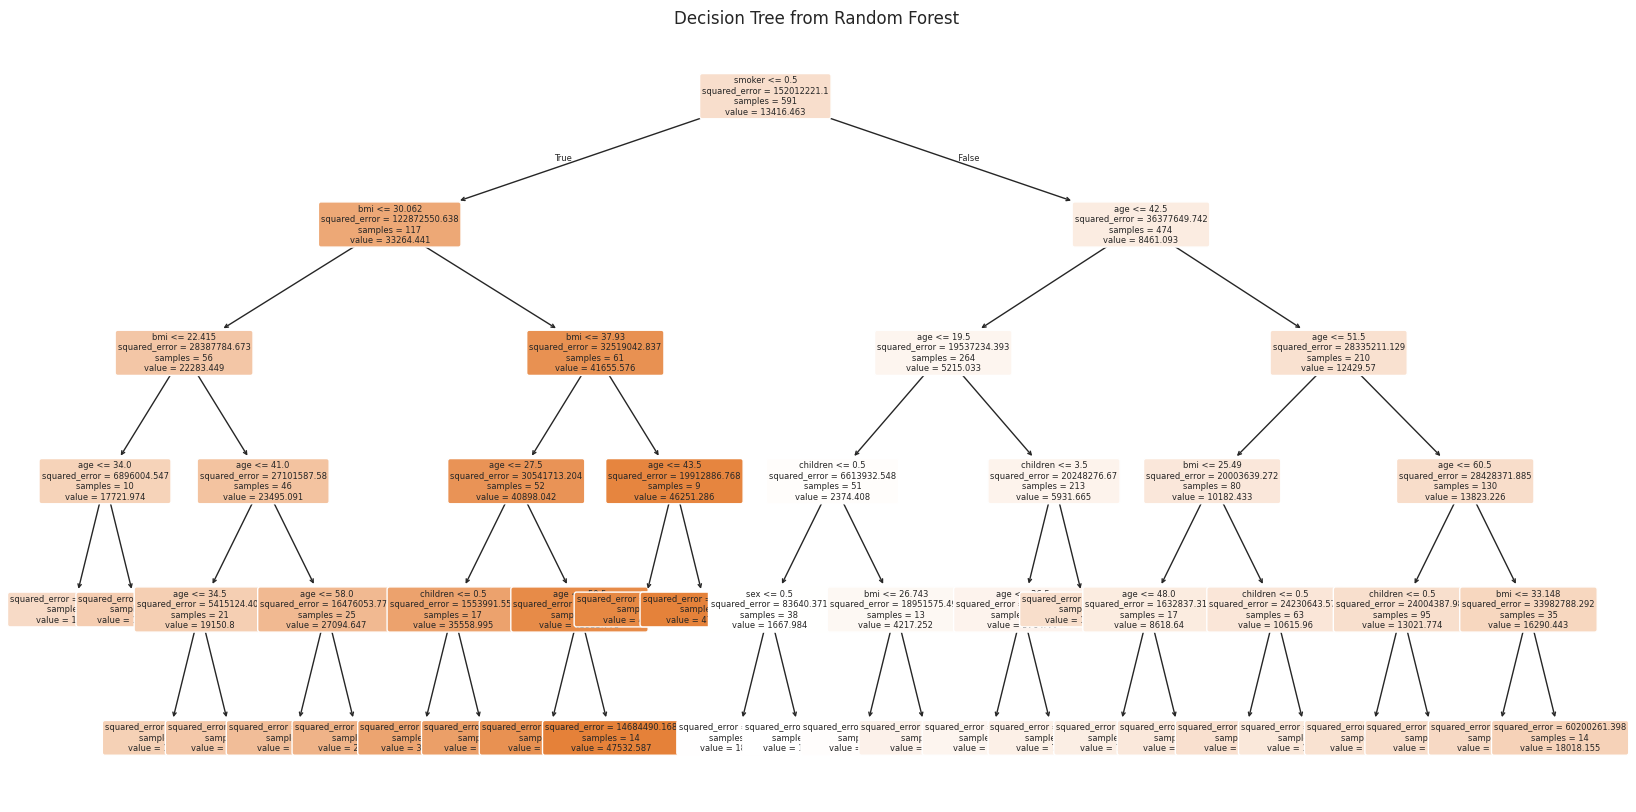

In [120]:
from sklearn.tree import plot_tree

tree_plot = final_rf_regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_plot, feature_names=X.columns, filled=True, rounded=True, fontsize=6)
plt.title("Decision Tree from Random Forest")
plt.show()

Predictive Algorithm

In [121]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = final_rf_regressor.predict(input_data_reshaped)
print(prediction)

[4888.14261469]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [123]:
import pickle as pkl

In [125]:
pkl.dump(final_rf_regressor, open('InsuranceRFRG.pkl', 'wb'))